In [1]:
%reset -f
%config Completer.use_jedi = True
# %matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os,glob,sys,importlib#,scipy,coolbox,pybedtools,
from scipy.stats import linregress
from scipy.ndimage import gaussian_filter
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from scipy import stats
import biosppy
# from sklearn import metrics
os.chdir('/home/dcmorgan')
os.getcwd()

# sys.path.insert(1, './run/oric/Plectoneme/')
# import savitzky_golay
# importlib.reload(sys.modules['savitzky_golay'])
# from savitzky_golay import savitzky_golay

# import networkx as nx
# from joblib.externals.loky import set_loky_pickler
# from joblib import parallel_backend
# from joblib import Parallel, delayed
# from joblib import wrap_non_picklable_objects


'/home/dcmorgan'

In [ ]:
!cut -f2,3,4 ~/data/meta/NC_004252_R0396-MWT.bedgraph

In [ ]:
primary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Primary Data')
diet=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Diet Data')
blood_stool=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='blood and stool biomarkers')
secondary=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='Secondary Data')
MRI=pd.read_excel('data/Data Raw - Gut Microbiome Cohort Project Database - 300 Cohort v3.0_280921.xlsx',index_col=0,sheet_name='MRI scores')

In [ ]:
unibact=pd.read_csv('data/328_krakenuniq_raw.csv',index_col=0)
unibact['spec']=(unibact.index).str.split(';').str[0:6].tolist()
# jeff=pd.DataFrame(unibact['spec'].tolist(),columns=['tmp','tmp','tmp','tmp','tmp','species'])
# jeff=jeff.fillna(method='ffill',axis=1)


In [ ]:
unibact.columns=unibact.columns.str.split('-').str[0].tolist()

In [ ]:
PP=primary[primary.index.isin(unibact.columns)]



In [ ]:
sub_uni=unibact[primary.index[primary.index.isin(unibact.columns)]]
sub_uni.columns=PP['Hypertension Category by 24h BP w/o considering antihypertensive med']
# sub_uni

### corr network

In [ ]:
aa=np.corrcoef((sub_uni[2]).astype(float))
# aa=aa[aa!=1]
a=plt.hist(aa.flatten(),bins=100,log=True,alpha=.65)

bb=np.corrcoef((sub_uni[1]).astype(float))
# bb=bb[bb!=1]
b=plt.hist(bb.flatten(),bins=100,log=True,alpha=.5)

cc=np.corrcoef((sub_uni[0]).astype(float))
# cc=cc[cc!=1]
c=plt.hist(cc.flatten(),bins=100,log=True,alpha=.35)

In [ ]:
a=nx.from_numpy_array(aa[1:100,1:100])
b=nx.from_numpy_array(bb[1:100,1:100])
c=nx.from_numpy_array(cc[1:100,1:100])

# cc.shape

In [ ]:
nx.draw(a)
nx.draw(b)
nx.draw(c)

In [ ]:
# nx.from_numpy_array(aa[(aa>.5)&(aa[1:100,1:100])])
nx.average_clustering(a)

In [ ]:
aa=np.array(stats.spearmanr(sub_uni[2],axis=1))
# aa=aa[aa!=1]
a=plt.hist(aa.flatten(),bins=100,log=True,alpha=.65)

bb=np.array(stats.spearmanr(sub_uni[1],axis=1))
# bb=bb[bb!=1]
b=plt.hist(bb.flatten(),bins=100,log=True,alpha=.5)

cc=np.array(stats.spearmanr(sub_uni[0],axis=1))
# cc=cc[cc!=1]
c=plt.hist(cc.flatten(),bins=100,log=True,alpha=.35)

In [ ]:
ww=plt.hist(bb-cc,bins=100,alpha=.65,log=True)
ww=plt.hist(bb-aa,bins=100,alpha=.5,log=True)
ww=plt.hist(aa-cc,bins=100,alpha=.35,log=True)

In [ ]:
from scipy import stats
cc=np.array(stats.spearmanr(unibact.values[0:1000,0:1000])).flatten()
cc=cc[cc!=1]
# np.array(cc)
cc=plt.hist(cc,bins=100,log=True)

In [ ]:
oric=pd.read_csv('data/doric10/tubic_bacteria.csv') #remove 'note' and 'nt*' from file

In [ ]:
oric['oric_start']=oric['Location of replication origin'].str.split('.').str[0].str.split(',').str[0].str.split(';').str[0].tolist()
oric['oric_end']=oric['Location of replication origin'].str.split('.').str[2].str.split(',').str[0].str.split(';').str[0].tolist()
oric['gene_start']=oric['Location of replication genes'].str.split('.').str[0].str.split(',').str[0].str.split(';').str[0].tolist()
oric['gene_end']=oric['Location of replication genes'].str.split('.').str[2].str.split(',').str[0].str.split(';').str[0].tolist()

In [ ]:
oric['OriC AT content']=np.round(oric['OriC AT content']*100).astype(int)
oric['orgA']=oric['Organism'].str.split(' ').str[0].tolist()
oric['orgB']=oric['Organism'].str.split(' ').str[1].tolist()
oric['Organism']=oric['orgA']+'_'+oric['orgB']


In [ ]:
oric[['oric_start','oric_end','gene_start','gene_end']]=oric[['oric_start','oric_end','gene_start','gene_end']].replace('-','1')
oric=oric.fillna('1')

In [ ]:
oric[['gene_start']]=oric[['gene_start']].astype(int)
oric[['gene_end']]=oric[['gene_end']].astype(int)
oric[['oric_start']]=oric[['oric_start']].astype(int)
oric[['oric_end']]=oric[['oric_end']].astype(int)

In [ ]:
# oric['end']=np.amax(oric[['oric_start','oric_end','gene_start','gene_end']],1)
# oric['start']=np.amin(oric[['oric_start','oric_end','gene_start','gene_end']],1)
jj=ori[ori['oric_start']>ori['oric_end']]#
jj['oric_end']=jj['oric_start']+jj['oric_end']
ff=ori[ori['oric_start']<ori['oric_end']]
ORIC=ff.append(jj)

In [ ]:
ORIC['refseq']=ORIC['Refseq'].str.split('.').str[0].tolist()
ORIC['len']=ORIC['oric_end']-ORIC['oric_start']

In [ ]:
ORIC[['refseq','oric_start','oric_end','OriC AT content','Organism','len']].to_csv('data/doric10/OriC_db.bed',sep='\t',header=True,index=False)

In [ ]:
sns.set_style("white")
tmp=plt.hist(ORIC['len'],bins=100,log=True)

In [ ]:
traces= np.sort(glob.glob('data/meta*/*bedgraph'))
jac=traces[1000]
e='NC_'+jac.split('/')[2].split('_')[1]

In [ ]:
e='NC_'+os.path.basename(jac).split('_')[1]
e

In [ ]:

table=[]
# color=pd.DataFrame()
color0=pd.DataFrame(columns=['species','subj','ratio','slope'])

traces= np.sort(glob.glob('data/meta*/*bedgraph'))
ori=pd.read_csv('data/doric10/OriC_db.bed',sep='\t')
# cc=ori[ori['Organism']==('Escherichia_coli')]
cc=ori
dd=cc[cc['refseq'].str.contains('NC_')]['refseq']

i=0
for d,c in tqdm(enumerate(traces)):
    # indices = [i for i, s in enumerate(traces) if c in s]
#     # if not indices.zeros:
    # if indices !=[]:
    # tmp0=ori[ori.refseq=='NC_'+os.path.basename(traces[0]).split('_')[1]]
    jac=traces[d]
    e='NC_'+os.path.basename(jac).split('_')[1]
    f=jac.split('/')[2].split('_')[2].split('-')[0]
    tmp=ori[ori['refseq'].str.contains(e)]
    if tmp.zeros==False:
        for uu in range(len(tmp)):
        
            # for dd,cc in tqdm(enumerate(d)):

            # ax = axes[SLICES[i]]
            zzz=pd.read_csv(jac,sep='\t',names=['tmp','start','end','relAb'])


            zzz['len']=zzz['end']-zzz['start']
            jeff3=np.repeat((zzz.relAb), repeats = zzz['len'])
            jeff3=jeff3.reset_index()
            # df0=jeff3.groupby(jeff3.index // 1000).sum()
            # try:
        
            ppp=tmp.iloc[uu]['oric_start'].item()
            # ppp=tmp['oric_start'].item()
            jj=jeff3.loc[ppp].values[1]
            cc=jeff3.loc[ppp-1000:ppp+1000+tmp.iloc[uu]['len']]
            
            # jj=df0.relAb[int(np.round(ppp/1000,-2))]
            # table.append()
            df1=jeff3.sort_values(by='relAb')
            df2=df1[(df1['relAb']>np.median(df1[df1['relAb']!=0])/5)&(df1['relAb']<np.median(df1[df1['relAb']!=0])*5)]
            df2=df2.reset_index()
            color0['species']=e
            color0['subj']=f
            color0['ratio']=np.mean(cc.relAb)/np.mean(jeff3.relAb),
            color0['slope']=linregress((df2.index), (df2.relAb))[0]
            # table.append(jeff22)
            if i==0:
                color0.to_csv('data/relAb_ratio5.txt',sep='\t')
                i=i+1
            else:
                color0.to_csv('data/relAb_ratio5.txt',sep='\t',mode='a',header=False,index=False)
                
            # print(jj/np.mean(df0.relAb))
            # print(jj)
            # except:
            #     pass

In [ ]:
data=pd.read_csv('data/relAb_ratio5.txt',sep='\t')#,names=['species','subj','ratio','slope'])
# d
plt.figure(figsize=(10,5))
# plt.figsize=(40, 40)
data2=data[data['ratio']>0]
ax=sns.scatterplot(data=data2, x="ratio", y="slope", hue="species",style='subj')
plt.legend([],[], frameon=False)
j=str(np.round(scipy.corrcoef(data2.ratio,data2.slope)[0][1],5))
h=str(np.round(scipy.stats.spearmanr(data2.ratio,data2.slope)[0],5))
plt.title('pearson: '+j+'; spearman: '+h)
# ax.legend(loc='best',ncol=10, title="Title")

In [ ]:
jacc=4
'data/relAb_ratio'+str(jacc)+'.txt'


In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(data=data2, x="ratio", hue="species")#, multiple="dodge", shrink=.8)


In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(data=data2, x="slope", hue="species")

# Plectoneme

### from https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

In [7]:
Swave=pd.read_csv('run/oric/Plectoneme/gordon_fasta/depleted.fasta')
# jeff=Swave.iloc[2].item()
# Swave = []
# Swave.extend(jeff)
# # print(Swave)
# Swave=np.array(Swave)
jeff=Swave[0::2]['>VIC01_RS00010'].tolist()
jeff=str(jeff).replace(',','')
jeff=str(jeff).replace("'","")
jeff=str(jeff).replace(' ','')
jeff=jeff[1:]
Swave=jeff[0:10000]

#### reproduce Fig2B seqA plot

In [412]:
Swave='CGCTATTCTTCGGTTAACGAAGTCTGTAATTGATTTGTTAAGTTTTTCTTTTGAATATACGCATTAATTTTAGATTGAATTTGCTGAAGCTCTTCTTGATCAGCTTCTCGAATGGTTTGCTCCTTTTGTTCGCTCGTTAACGATTGTGAAGAAGCAGGAGACTGATTAGGGGCTGTCTCCACTTCATTTGTTTTTTTCGTACTTTTAGCTGCAGGGGTATTTGAAGGCTGAACCGCTTCTTCAGATTCCTGCAGAGATTGAAATTCCATCACGCCCGTTCCTCCAACGAACGCTTCATTAAATGCGCGAGAAAGGTTCTTAAATTTCTGCGCATCCACTGAGCTCATTGCAAACAATACAATGAATAAAGCAAGTAAAAGTGTAAGCAAATCTGAGTAAGGAAGCAGCCAGCTTTCGTCAACATGGTCCTCTTCATGCTTTCGTTTTCTGCGTCTACTCATTTATGCCCACTTCACTTTCTTGAAGAAGCTTTTTACGTTCCGCTGTTGGCAAATAAGAAGCCAGCTTTTGCTCAATTACTTTTGGTGTTTCTCCTTCTAAAAGTGAAAGCACTCCTTCGATCATCATATACTTTACCTTTACTTCATGTTTCGATTTACGCTTTAGTTTATTTGCAAACGGATGCCATAGTACATACCCAGTAAAAATACCAAGAAGCGTAGCAACAAACGCCGCGCTGATCGCATGTCCTAGCGTATCTGTATCTTCCATGTTCCCAAGCGCAGCAATTAACCCTATAACAGCTCCAAGTACACCCAGAGTTGGAGCATATGTACCTGCTAAAGCGAAAATACTTGCACCCGTTTGATGTCTTTCTTCCATAGCATCAATTTCTTCAGACAACACGTCTCGTATATAATCCGCACTTTGACCATCAATAGCTAAATTCAAACCATTTTTTAAGAAAGGGTCATCTACATCAATAATTTGGGCTTCAAGTGATAGTAACCCTTCTTTTCGAACAACTTGTCCCCATTCAGAAAACGCGT'

In [465]:
igordat=pd.read_csv('run/oric/Plectoneme/igor_out.txt',sep='\t')
dnapath=pd.read_csv('run/oric/Plectoneme/dnapath.txt',sep='\t',names=['A','B','C','tmp'])
bp_cov=pd.read_csv('run/oric/Plectoneme/bp_cov.txt',sep='\t',names=['A','B'])
tanvector=pd.read_csv('run/oric/Plectoneme/tanvector.txt',sep='\t',names=['A','B','C'])
localcov=pd.read_csv('run/oric/Plectoneme/localcov.txt',sep='\t',names=['A','B'])
normvector=pd.read_csv('run/oric/Plectoneme/normvector.txt',sep='\t',names=['A','B','C'])
curvevector=pd.read_csv('run/oric/Plectoneme/CurveVector.txt',sep='\t',names=['A','B','C'])

In [414]:
sys.path.insert(1, './run/oric/Plectoneme/')
import PlectonemeCode
importlib.reload(sys.modules['PlectonemeCode'])
from PlectonemeCode import PlectonemeCode

Sequence_angle_exp_smth,Sequence_angle_exp,CurvePhase,BasepairCovariance= PlectonemeCode(Swave)
#,wave['Direction (ϕB, degrees)'],wave['Wedge (θ, degrees)'],
#                wave['Twist (degrees)'],wave['Tilt-Tilt covariance'],wave['Roll-Roll covariance'])


/home/dcmorgan/./run/oric/Plectoneme/PlectonemeCode.py:117: RuntimeWarning: invalid value encountered in true_divide
  CurrentCurve=np.divide(CurrentCurve,CurveMag[ii])	#normalize the curvature vector to track direction
/home/dcmorgan/./run/oric/Plectoneme/PlectonemeCode.py:125: RuntimeWarning: invalid value encountered in remainder
  CurvePhase[ii]=np.mod(np.arctan2(SinCurve,CosCurve)+Sequence_phase[ii],2*np.pi)
/home/dcmorgan/./run/oric/Plectoneme/PlectonemeCode.py:148: RuntimeWarning: divide by zero encountered in log
  Sequence_angle_energy=-np.log(Sequence_angle_exp)  #Backing out the implied energy landscape from the summed Boltzmann weights


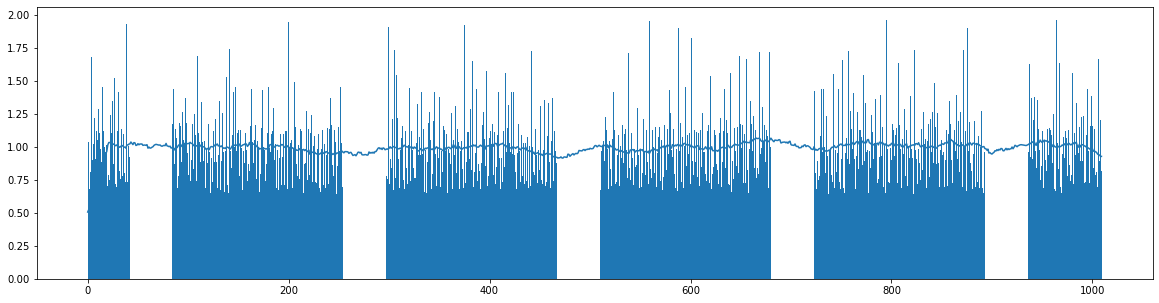

In [364]:
jeff=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,0,0], kernel='boxcar', size=40)
# jeff
plt.figure(figsize=(20,5))
plt.bar(np.arange(len(BasepairCovariance)),BasepairCovariance[:,0,0])
plt.plot(np.arange(len(jeff[0])),jeff[0])

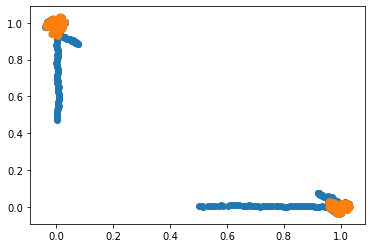

In [469]:
# plt.scatter(BasepairCovariance[:,0],BasepairCovariance[:,1])
# plt.scatter(bp_cov.A,bp_cov.B,alpha=.5)
plt.scatter(LocalCovariance[:,0],LocalCovariance[:,1])
plt.scatter(localcov.A,localcov.B,alpha=.5)

[array([[1.        , 0.92425609],
        [0.92425609, 1.        ]]),
 SpearmanrResult(correlation=0.990295186650677, pvalue=0.0)]

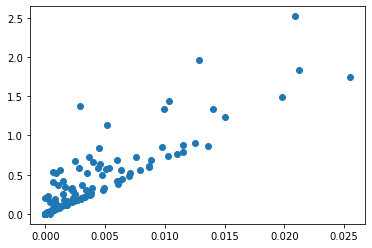

In [470]:
plt.scatter(igordat.Sequence_angle_exp,Sequence_angle_exp)
[np.corrcoef(igordat.Sequence_angle_exp,Sequence_angle_exp),
stats.spearmanr(igordat.Sequence_angle_exp,Sequence_angle_exp)]

/tmp/ipykernel_54634/4168662407.py:23: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(Sequence_phase),np.log(igordat.Sequence_phase))
/home/dcmorgan/.conda/envs/mypy3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


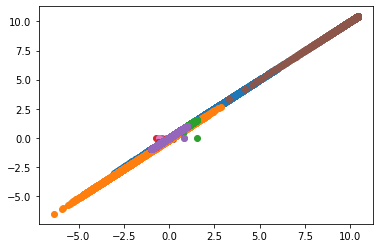

In [190]:
plt.scatter(normvector[0:1010].A,NormVector[:,0])
plt.scatter(normvector[0:1010].B,NormVector[:,1])
plt.scatter(normvector[0:1010].C,NormVector[:,2])
plt.scatter(CurvePhase,igordat.CurvePhase)

plt.scatter(tanvector[0:1010].A,TanVector[:,0])
plt.scatter(tanvector[0:1010].B,TanVector[:,1])
plt.scatter(tanvector[0:1010].C,TanVector[:,2])

plt.scatter(curvevector[0:1010].A,CurveVector[:,0])
plt.scatter(curvevector[0:1010].B,CurveVector[:,1])
plt.scatter(curvevector[0:1010].C,CurveVector[:,2])

cc=np.concatenate((DNApath,DNApathMajorGroove),axis=0)
plt.scatter(dnapath.A,cc[1:,0])
plt.scatter(dnapath.B,cc[1:,1])
plt.scatter(dnapath.C,cc[1:,2])

plt.scatter(igordat.CurveMag,CurveMag)
plt.scatter(curvevector.B,CurveVector[:,1])
plt.scatter(curvevector.C,CurveVector[:,2])

plt.scatter(np.log(Sequence_phase),np.log(igordat.Sequence_phase))

<BarContainer object of 1010 artists>

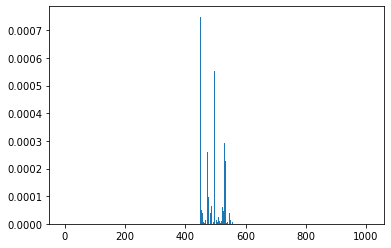

In [854]:
#SG
jeff=np.arange(len(Sequence_angle_exp))
# np.log(Sequence_angle_exp_smth)
# np.log(Sequence_angle_exp)

cc=Sequence_angle_exp#np.nan_to_num((Sequence_angle_exp), copy=False, nan=0.0, posinf=0.0, neginf=0.0)
dd=Sequence_angle_exp_smth/np.mean(Sequence_angle_exp_smth)#np.nan_to_num((Sequence_angle_exp_smth), copy=False, nan=0.0, posinf=0.0, neginf=0.0)

# plt.figure(figsize=(20,5))
plt.bar(jeff,cc)
# plt.bar(np.arange(len(Sequence_angle_exp)),Sequence_angle_exp)
# plt.plot(jeff,dd)


<BarContainer object of 1010 artists>

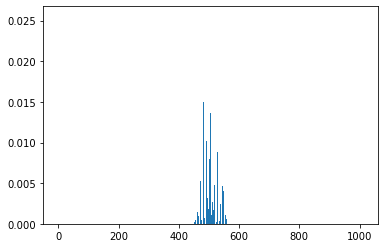

In [840]:
plt.bar(igordat.index,igordat.Sequence_angle_exp)
# plt.plot(igordat.index,igordat.Sequence_angle_exp_smth)


In [322]:
sys.path.insert(1, './run/oric/Plectoneme/')
# import savitzky_golay
importlib.reload(sys.modules['load_measures'])
# from savitzky_golay import savitzky_golay
# from smooth import smooth
import load_measures
from load_measures import load_measures
# Swave='CGCTATTCTTCGGTTAACGAAGTCTGTAATTGATTTGTTAAGTTTTTCTTTTGAATATACGCATTAATTTTAGATTGAATTTGCTGAAGCTCTTCTTGATCAGCTTCTCGAATGGTTTGCTCCTTTTGTTCGCTCGTTAACGATTGTGAAGAAGCAGGAGACTGATTAGGGGCTGTCTCCACTTCATTTGTTTTTTTCGTACTTTTAGCTGCAGGGGTATTTGAAGGCTGAACCGCTTCTTCAGATTCCTGCAGAGATTGAAATTCCATCACGCCCGTTCCTCCAACGAACGCTTCATTAAATGCGCGAGAAAGGTTCTTAAATTTCTGCGCATCCACTGAGCTCATTGCAAACAATACAATGAATAAAGCAAGTAAAAGTGTAAGCAAATCTGAGTAAGGAAGCAGCCAGCTTTCGTCAACATGGTCCTCTTCATGCTTTCGTTTTCTGCGTCTACTCATTTATGCCCACTTCACTTTCTTGAAGAAGCTTTTTACGTTCCGCTGTTGGCAAATAAGAAGCCAGCTTTTGCTCAATTACTTTTGGTGTTTCTCCTTCTAAAAGTGAAAGCACTCCTTCGATCATCATATACTTTACCTTTACTTCATGTTTCGATTTACGCTTTAGTTTATTTGCAAACGGATGCCATAGTACATACCCAGTAAAAATACCAAGAAGCGTAGCAACAAACGCCGCGCTGATCGCATGTCCTAGCGTATCTGTATCTTCCATGTTCCCAAGCGCAGCAATTAACCCTATAACAGCTCCAAGTACACCCAGAGTTGGAGCATATGTACCTGCTAAAGCGAAAATACTTGCACCCGTTTGATGTCTTTCTTCCATAGCATCAATTTCTTCAGACAACACGTCTCGTATATAATCCGCACTTTGACCATCAATAGCTAAATTCAAACCATTTTTTAAGAAAGGGTCATCTACATCAATAATTTGGGCTTCAAGTGATAGTAACCCTTCTTTTCGAACAACTTGTCCCCATTCAGAAAACGCGT'
Twave, Wwave, Dwave, CwaveRR, CwaveTT=load_measures()

In [323]:
Twave, Wwave, Dwave, CwaveRR, CwaveTT=load_measures()
    SeqLength=len(Swave)
    rise=0.339
    
    DNApath,DNApathMajorGroove=(np.zeros([SeqLength,4]) for i in range(2))
    BasepairCovariance,LocalCovariance=(np.zeros([SeqLength,2,2]) for i in range(2))
    CurvatureSequence,Sequence_phase,Sequence_angle_energy,Sequence_angle_exp,EndEffects= (np.zeros(SeqLength) for i in range(5))
    
    StartPos=[0,0,0,1]
    StartPosMG=[1,0,0,1]
    DNApath[0]= StartPos
    Minverse_tot=np.identity(4)
    M_tot=Minverse_tot
    T_n=M_tot
    T_n[3,2]=-rise/2
    
    #This loop finds the 3D path of the relaxed DNA
    Letter1=0
    for ii in (np.arange(SeqLength-1)):
        ii=ii+1
        if Swave[ii]=='A':
            Letter2=0
        elif Swave[ii]=='C':
            Letter2=1
        elif Swave[ii]=='G':
            Letter2=2
        else:
            Letter2=3
    
        index = 4*Letter1+Letter2			#The index defines the current dinucleotide, AA=0, AC=1,...TT=15
        Sequence_phase[ii]=Sequence_phase[ii-1]+Twave[index]					#This is used to measure how far around the DNA the major groove has rotated relative to the first base pair
        BendRot=np.transpose(np.array([[np.cos(Sequence_phase[ii]), np.sin(Sequence_phase[ii])],[-np.sin(Sequence_phase[ii]),np.cos(Sequence_phase[ii])]])) #Rotation matrix
        Covariance=np.array([[CwaveRR[index], 0],[0,CwaveTT[index]]])	#The covariance matrix for the current basepair, expressed in the coordinates of the current basepair
        CovRot = BendRot@Covariance@np.transpose(BendRot) #Rotating the covariance matrix so it will line up with its neighbors
        BasepairCovariance[ii]=CovRot#np.sum(CovRot,axis=1)					#Rotated covariance matrix at position is recorded
    
        omDiv2_n=Twave[index]/2
        Romega_n=np.transpose(np.array([[np.cos(omDiv2_n),np.sin(omDiv2_n),0,0],[-np.sin(omDiv2_n),np.cos(omDiv2_n),0,0],[0,0,1,0],[0,0,0,1]]))
        alpha_n=Wwave[index]
        beta_n=Dwave[index]-np.pi/2
    
        Rzplus=np.transpose(np.array([[np.cos(beta_n),np.sin(beta_n),0,0],[-np.sin(beta_n),np.cos(beta_n),0,0],[0,0,1,0],[0,0,0,1]]))
        Rx=np.transpose(np.array([[1,0,0,0],[0,np.cos(-alpha_n),np.sin(-alpha_n),0],[0,-np.sin(-alpha_n),np.cos(-alpha_n),0],[0,0,0,1]]))
        Rzminus=np.transpose(np.array([[np.cos(-beta_n),np.sin(-beta_n),0,0],[-np.sin(-beta_n),np.cos(-beta_n),0,0],[0,0,1,0],[0,0,0,1]]))
    
        Q_n = Rzminus@Rx@Rzplus
        Minverse_n = np.linalg.inv(T_n@Romega_n@Q_n@Romega_n@T_n)
        Minverse_new =  Minverse_n@Minverse_tot
        
        Minverse_tot=Minverse_new #Updating the total tranformation matrix
        CurrentPos = np.transpose(Minverse_tot)@StartPos  #Calculate the coordinates of the current basepair
        CurrentPosMG =  np.transpose(Minverse_tot)@StartPosMG
    
        DNApath[ii]=CurrentPos
        DNApathMajorGroove[ii]=CurrentPosMG
        Letter1=Letter2
    
    # print("path calculated")
    
    #Make the curvature calculation
    CircFrac=0.667	#We assume the plectoneme tip makes a 240� arc before joining the bulk plectoneme region
    BindLength=450   #experimentally, ~450 nt are bound to the surface at each end of the DNA
    AvePlecLength=1000
    
    tanlength=10 #must be even. This is number of basepairs used to calculate the local tangent vectors.
    
    
    
    for CurveWindow in (np.arange(40,119,8)):# (CurveWindow=40; CurveWindow<120; CurveWindow+=8)
        # LocalCovariance[:,0]=savitzky_golay(BasepairCovariance[:,0],CurveWindow+1,2)		#Find covariance matrix over the curvature window
        # LocalCovariance[:,1]=savitzky_golay(BasepairCovariance[:,1],CurveWindow+1,2)
        LocalCovariance[:,0,0]=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,0,0], kernel='boxcar', size=CurveWindow,mirror=False)[0]
        LocalCovariance[:,1,1]=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,1,1], kernel='boxcar', size=CurveWindow,mirror=False)[0]
        LocalCovariance[:,1,0]=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,1,0], kernel='boxcar', size=CurveWindow,mirror=False)[0]
        LocalCovariance[:,0,1]=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,0,1], kernel='boxcar', size=CurveWindow,mirror=False)[0]
        # kernel_size=len(BasepairCovariance[:,0])
        # LocalCovariance[:,0]=signal.convolve(BasepairCovariance[:,0],np.ones(kernel_size)/kernel_size,mode='same')
        # LocalCovariance[:,1]=signal.convolve(BasepairCovariance[:,1],np.ones(kernel_size)/kernel_size,mode='same')
        # w=2
        # s=CurveWindow+1
        # t = (((w - 1)/2)-0.5)/s
        # LocalCovariance=gaussian_filter(BasepairCovariance,sigma=s, truncate=t)
    
        TanVector, NormVector,CurveVector=(np.zeros([SeqLength,3]) for i in range(3))
        CurveMag, CurvePhase, HalfCurveMag, HalfCurvePhase=(np.zeros([SeqLength]) for i in range(4))
        NormVector=DNApathMajorGroove[:,0:3]-DNApath[:,0:3]  #identifies the normal vector alligned with the major groove
        CurrentTan, CurrentCurve, tP, tM, CurveCross, CurrentNorm=(np.zeros(3) for i in range(6))
    
        # find the tan vectors over tanlength
        half_tan_len=int(tanlength/2)
        for ii in np.arange(half_tan_len,SeqLength-half_tan_len-1):
            CurrentTan=DNApath[ii+half_tan_len]-DNApath[ii-half_tan_len]
            VectorMag=np.sqrt(np.dot(CurrentTan, CurrentTan))
            TanVector[ii]=(CurrentTan/VectorMag)[0:3] #Normalizes tangent vector to unit length
        half_curve=int(CurveWindow/2)
        # find the curvature vectors and values over CurveWindow
        for ii in np.arange(half_curve, SeqLength-half_curve-1):
            tP=TanVector[ii+half_curve]	#plus tan vector
            tM=TanVector[ii-half_curve]	#minus tan vector
            CurrentCurve =np.cross(tP,tM)   #Cross product
            CurveVector[ii]=CurrentCurve  #curvature vector is recorded at this position
            CurveMag[ii]=np.arcsin(np.sqrt(np.dot(CurrentCurve, CurrentCurve)))
    
            CurrentCurve=np.divide(CurrentCurve,CurveMag[ii])	#normalize the curvature vector to track direction
            #Calculates the phase angle of the curvature relative to major groove at start of DNA
            CurrentTan=TanVector[ii]
            CurrentNorm=NormVector[ii]
            
            CosCurve=np.dot(CurrentCurve, CurrentNorm)
            CurveCross=np.cross(CurrentCurve,CurrentNorm)
            SinCurve=np.dot(CurveCross, CurrentTan)
            CurvePhase[ii]=np.mod(np.arctan2(SinCurve,CosCurve)+Sequence_phase[ii],2*np.pi)
        EnergyOffset=25-CurveWindow*0.334*3/4.06   #adds energy penalty from pulling in DNA ends against a force
    
        for ii in np.arange(BindLength,SeqLength-BindLength-1):
            Covariance=LocalCovariance[ii]
            BendRot=np.transpose(np.array([[np.cos(CurvePhase[ii]), np.sin(CurvePhase[ii])],[-np.sin(CurvePhase[ii]),np.cos(CurvePhase[ii])]]))
            CovRot = ( BendRot @ Covariance @ np.transpose(BendRot))		#local covariance matrix alligned to major groove
            BendRot=np.transpose(np.array([[np.cos(np.pi/4), np.sin(np.pi/4)],[-np.sin(np.pi/4),np.cos(np.pi/4)]]))
            CovRot45 = ( BendRot @ Covariance @ np.transpose(BendRot))		#local covariance matrix alligned 45� to major groove
            Cnorm=CurveMag[ii]/(2*np.pi*CircFrac)
            # Cnorm=0				#Uncomment to compare to straight DNA with variable stiffness
            E_base=CircFrac**2*3000/CurveWindow
            Z1=np.exp(-E_base/CovRot[0][0]*((1-Cnorm)**2)+EnergyOffset)			#Bend in direction of curve
            Z2=np.exp(-E_base/CovRot[0][0]*((1+Cnorm)**2)+EnergyOffset)			#Bend against curve
            Z3=np.exp(-E_base/CovRot[1][1]*(1-(Cnorm)**2)+EnergyOffset)			#Bend perpendicular to curve
            Z4=np.exp(-E_base/CovRot45[0][0]*(np.sqrt(Cnorm**2/2+1)-Cnorm/np.sqrt(2))**2+EnergyOffset)		#Bend at 45, 135, 225, and 315
            Z5=np.exp(-E_base/CovRot45[0][0]*(np.sqrt(Cnorm**2/2+1)+Cnorm/np.sqrt(2))**2+EnergyOffset)
            Z6=np.exp(-E_base/CovRot45[1][1]*(np.sqrt(Cnorm**2/2+1)-Cnorm/np.sqrt(2))**2+EnergyOffset)
            Z7=np.exp(-E_base/CovRot45[1][1]*(np.sqrt(Cnorm**2/2+1)+Cnorm/np.sqrt(2))**2+EnergyOffset)
    
            Sequence_angle_exp[ii]=Z1+Z2+2*Z3+Z4+Z5+Z6+Z7
    
    
    Sequence_angle_energy=-np.log(Sequence_angle_exp)  #Backing out the implied energy landscape from the summed Boltzmann weights
# what is P???
# EndEffects=max(0,min(1,(p-BindLength)/AvePlecLength)*min(1,(SeqLength-p-BindLength)/AvePlecLength))  //takes into account the effects of the handles, including limited plectoneme growth near the attachment points

    EndEffects=max(0,min(1,(BindLength)/AvePlecLength)*min(1,(SeqLength-BindLength)/AvePlecLength))#  //takes into account the effects of the handles, including limited plectoneme growth near the attachment points
    Sequence_angle_exp=Sequence_angle_exp*EndEffects
    
    Sequence_angle_exp_smth=np.copy(Sequence_angle_exp)
    # np.nan_to_num(Sequence_angle_exp_smth, copy=True, nan=0.0, posinf=None, neginf=None)
    # kernel_size=len(Sequence_angle_exp_smth)
    for i in (np.arange(64)):
        # Sequence_angle_exp_smth=savitzky_golay(Sequence_angle_exp_smth,65,2)		#Find covariance matrix over the curvature window
        # Sequence_angle_exp_smth=signal.convolve(Sequence_angle_exp_smth,np.ones(kernel_size)/kernel_size,mode='same')
        # w=2
        # s=300
        # t = (((w - 1)/2)-0.5)/s
        # Sequence_angle_exp_smth=gaussian_filter(Sequence_angle_exp_smth,sigma=s, truncate=t)
        Sequence_angle_exp_smth=biosppy.signals.tools.smoother(signal=Sequence_angle_exp_smth, kernel='boxcar', size=300,mirror=False)[0]
        Sequence_angle_exp_smth=Sequence_angle_exp_smth/np.mean(Sequence_angle_exp_smth)
        
    return Sequence_angle_exp_smth, Sequence_angle_exp,CurvePhase,BasepairCovariance
    import numpy as np
import os,sys
sys.path.insert(1, './run/oric/Plectoneme/')
import glob
from tqdm import tqdm
import pandas as pd
# from scipy import signal
import biosppy
from savitzky_golay import savitzky_golay
from load_measures import load_measures


def PlectonemeCode(Swave):
    Twave, Wwave, Dwave, CwaveRR, CwaveTT=load_measures()
    SeqLength=len(Swave)
    rise=0.339
    
    DNApath,DNApathMajorGroove=(np.zeros([SeqLength,4]) for i in range(2))
    BasepairCovariance,LocalCovariance=(np.zeros([SeqLength,2,2]) for i in range(2))
    CurvatureSequence,Sequence_phase,Sequence_angle_energy,Sequence_angle_exp,EndEffects= (np.zeros(SeqLength) for i in range(5))
    
    StartPos=[0,0,0,1]
    StartPosMG=[1,0,0,1]
    DNApath[0]= StartPos
    Minverse_tot=np.identity(4)
    M_tot=Minverse_tot
    T_n=M_tot
    T_n[3,2]=-rise/2
    
    #This loop finds the 3D path of the relaxed DNA
    Letter1=0
    for ii in (np.arange(SeqLength-1)):
        ii=ii+1
        if Swave[ii]=='A':
            Letter2=0
        elif Swave[ii]=='C':
            Letter2=1
        elif Swave[ii]=='G':
            Letter2=2
        else:
            Letter2=3
    
        index = 4*Letter1+Letter2			#The index defines the current dinucleotide, AA=0, AC=1,...TT=15
        Sequence_phase[ii]=Sequence_phase[ii-1]+Twave[index]					#This is used to measure how far around the DNA the major groove has rotated relative to the first base pair
        BendRot=np.transpose(np.array([[np.cos(Sequence_phase[ii]), np.sin(Sequence_phase[ii])],[-np.sin(Sequence_phase[ii]),np.cos(Sequence_phase[ii])]])) #Rotation matrix
        Covariance=np.array([[CwaveRR[index], 0],[0,CwaveTT[index]]])	#The covariance matrix for the current basepair, expressed in the coordinates of the current basepair
        CovRot = BendRot@Covariance@np.transpose(BendRot) #Rotating the covariance matrix so it will line up with its neighbors
        BasepairCovariance[ii]=CovRot#np.sum(CovRot,axis=1)					#Rotated covariance matrix at position is recorded
    
        omDiv2_n=Twave[index]/2
        Romega_n=np.transpose(np.array([[np.cos(omDiv2_n),np.sin(omDiv2_n),0,0],[-np.sin(omDiv2_n),np.cos(omDiv2_n),0,0],[0,0,1,0],[0,0,0,1]]))
        alpha_n=Wwave[index]
        beta_n=Dwave[index]-np.pi/2
    
        Rzplus=np.transpose(np.array([[np.cos(beta_n),np.sin(beta_n),0,0],[-np.sin(beta_n),np.cos(beta_n),0,0],[0,0,1,0],[0,0,0,1]]))
        Rx=np.transpose(np.array([[1,0,0,0],[0,np.cos(-alpha_n),np.sin(-alpha_n),0],[0,-np.sin(-alpha_n),np.cos(-alpha_n),0],[0,0,0,1]]))
        Rzminus=np.transpose(np.array([[np.cos(-beta_n),np.sin(-beta_n),0,0],[-np.sin(-beta_n),np.cos(-beta_n),0,0],[0,0,1,0],[0,0,0,1]]))
    
        Q_n = Rzminus@Rx@Rzplus
        Minverse_n = np.linalg.inv(T_n@Romega_n@Q_n@Romega_n@T_n)
        Minverse_new =  Minverse_n@Minverse_tot
        
        Minverse_tot=Minverse_new #Updating the total tranformation matrix
        CurrentPos = np.transpose(Minverse_tot)@StartPos  #Calculate the coordinates of the current basepair
        CurrentPosMG =  np.transpose(Minverse_tot)@StartPosMG
    
        DNApath[ii]=CurrentPos
        DNApathMajorGroove[ii]=CurrentPosMG
        Letter1=Letter2
    
    # print("path calculated")
    
    #Make the curvature calculation
    CircFrac=0.667	#We assume the plectoneme tip makes a 240� arc before joining the bulk plectoneme region
    BindLength=450   #experimentally, ~450 nt are bound to the surface at each end of the DNA
    AvePlecLength=1000
    
    tanlength=10 #must be even. This is number of basepairs used to calculate the local tangent vectors.
    
    
    
    for CurveWindow in (np.arange(40,119,8)):# (CurveWindow=40; CurveWindow<120; CurveWindow+=8)
        # LocalCovariance[:,0]=savitzky_golay(BasepairCovariance[:,0],CurveWindow+1,2)		#Find covariance matrix over the curvature window
        # LocalCovariance[:,1]=savitzky_golay(BasepairCovariance[:,1],CurveWindow+1,2)
        LocalCovariance[:,0,0]=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,0,0], kernel='boxcar', size=CurveWindow,mirror=False)[0]
        LocalCovariance[:,1,1]=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,1,1], kernel='boxcar', size=CurveWindow,mirror=False)[0]
        LocalCovariance[:,1,0]=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,1,0], kernel='boxcar', size=CurveWindow,mirror=False)[0]
        LocalCovariance[:,0,1]=biosppy.signals.tools.smoother(signal=BasepairCovariance[:,0,1], kernel='boxcar', size=CurveWindow,mirror=False)[0]
        # kernel_size=len(BasepairCovariance[:,0])
        # LocalCovariance[:,0]=signal.convolve(BasepairCovariance[:,0],np.ones(kernel_size)/kernel_size,mode='same')
        # LocalCovariance[:,1]=signal.convolve(BasepairCovariance[:,1],np.ones(kernel_size)/kernel_size,mode='same')
        # w=2
        # s=CurveWindow+1
        # t = (((w - 1)/2)-0.5)/s
        # LocalCovariance=gaussian_filter(BasepairCovariance,sigma=s, truncate=t)
    
        TanVector, NormVector,CurveVector=(np.zeros([SeqLength,3]) for i in range(3))
        CurveMag, CurvePhase, HalfCurveMag, HalfCurvePhase=(np.zeros([SeqLength]) for i in range(4))
        NormVector=DNApathMajorGroove[:,0:3]-DNApath[:,0:3]  #identifies the normal vector alligned with the major groove
        CurrentTan, CurrentCurve, tP, tM, CurveCross, CurrentNorm=(np.zeros(3) for i in range(6))
    
        # find the tan vectors over tanlength
        half_tan_len=int(tanlength/2)
        for ii in np.arange(half_tan_len,SeqLength-half_tan_len-1):
            CurrentTan=DNApath[ii+half_tan_len]-DNApath[ii-half_tan_len]
            VectorMag=np.sqrt(np.dot(CurrentTan, CurrentTan))
            TanVector[ii]=(CurrentTan/VectorMag)[0:3] #Normalizes tangent vector to unit length
        half_curve=int(CurveWindow/2)
        # find the curvature vectors and values over CurveWindow
        for ii in np.arange(half_curve, SeqLength-half_curve-1):
            tP=TanVector[ii+half_curve]	#plus tan vector
            tM=TanVector[ii-half_curve]	#minus tan vector
            CurrentCurve =np.cross(tP,tM)   #Cross product
            CurveVector[ii]=CurrentCurve  #curvature vector is recorded at this position
            CurveMag[ii]=np.arcsin(np.sqrt(np.dot(CurrentCurve, CurrentCurve)))
    
            CurrentCurve=np.divide(CurrentCurve,CurveMag[ii])	#normalize the curvature vector to track direction
            #Calculates the phase angle of the curvature relative to major groove at start of DNA
            CurrentTan=TanVector[ii]
            CurrentNorm=NormVector[ii]
            
            CosCurve=np.dot(CurrentCurve, CurrentNorm)
            tP=CurrentNorm
            tM=CurrentCurve
            CurveCross=np.cross(CurrentNorm,CurrentCurve)
            SinCurve=np.dot(CurveCross, CurrentTan)
            CurvePhase[ii]=np.mod(np.arctan2(SinCurve,CosCurve)+Sequence_phase[ii],2*np.pi)
        EnergyOffset=25-CurveWindow*0.334*3/4.06   #adds energy penalty from pulling in DNA ends against a force
    
        for ii in np.arange(BindLength,SeqLength-BindLength-1):
            Covariance=LocalCovariance[ii]
            BendRot=np.transpose(np.array([[np.cos(CurvePhase[ii]), np.sin(CurvePhase[ii])],[-np.sin(CurvePhase[ii]),np.cos(CurvePhase[ii])]]))
            CovRot = ( BendRot @ Covariance @ np.transpose(BendRot))		#local covariance matrix alligned to major groove
            BendRot=np.transpose(np.array([[np.cos(np.pi/4), np.sin(np.pi/4)],[-np.sin(np.pi/4),np.cos(np.pi/4)]]))
            CovRot45 = ( BendRot @ Covariance @ np.transpose(BendRot))		#local covariance matrix alligned 45� to major groove
            Cnorm=CurveMag[ii]/(2*np.pi*CircFrac)
            # Cnorm=0				#Uncomment to compare to straight DNA with variable stiffness
            E_base=CircFrac**2*3000/CurveWindow
            Z1=np.exp(-E_base/CovRot[0][0]*((1-Cnorm)**2)+EnergyOffset)			#Bend in direction of curve
            Z2=np.exp(-E_base/CovRot[0][0]*((1+Cnorm)**2)+EnergyOffset)			#Bend against curve
            Z3=np.exp(-E_base/CovRot[1][1]*(1-(Cnorm)**2)+EnergyOffset)			#Bend perpendicular to curve
            Z4=np.exp(-E_base/CovRot45[0][0]*(np.sqrt(Cnorm**2/2+1)-Cnorm/np.sqrt(2))**2+EnergyOffset)		#Bend at 45, 135, 225, and 315
            Z5=np.exp(-E_base/CovRot45[0][0]*(np.sqrt(Cnorm**2/2+1)+Cnorm/np.sqrt(2))**2+EnergyOffset)
            Z6=np.exp(-E_base/CovRot45[1][1]*(np.sqrt(Cnorm**2/2+1)-Cnorm/np.sqrt(2))**2+EnergyOffset)
            Z7=np.exp(-E_base/CovRot45[1][1]*(np.sqrt(Cnorm**2/2+1)+Cnorm/np.sqrt(2))**2+EnergyOffset)
    
            Sequence_angle_exp[ii]=Sequence_angle_exp[ii]+Z1+Z2+2*Z3+Z4+Z5+Z6+Z7
    
    
    Sequence_angle_energy=-np.log(Sequence_angle_exp)  #Backing out the implied energy landscape from the summed Boltzmann weights
# what is P???
# EndEffects=max(0,min(1,(p-BindLength)/AvePlecLength)*min(1,(SeqLength-p-BindLength)/AvePlecLength))  //takes into account the effects of the handles, including limited plectoneme growth near the attachment points
#
    EndEffects=max(0,min(1,(BindLength)/AvePlecLength)*min(1,(SeqLength-BindLength)/AvePlecLength))#  //takes into account the effects of the handles, including limited plectoneme growth near the attachment points
    A=np.zeros([AvePlecLength,2])
    for p in np.arange(AvePlecLength):
        A[p,0]=(p-BindLength)/AvePlecLength
        A[p,1]=(SeqLength-p-BindLength)/AvePlecLength
    EndEffects=np.max(min(A[:,0])*min(A[:,1]))
    
    Sequence_angle_exp=Sequence_angle_exp*EndEffects
    
    Sequence_angle_exp_smth=np.copy(Sequence_angle_exp)
    # np.nan_to_num(Sequence_angle_exp_smth, copy=True, nan=0.0, posinf=None, neginf=None)
    # kernel_size=len(Sequence_angle_exp_smth)
    for i in (np.arange(64)):
        # Sequence_angle_exp_smth=savitzky_golay(Sequence_angle_exp_smth,65,2)		#Find covariance matrix over the curvature window
        # Sequence_angle_exp_smth=signal.convolve(Sequence_angle_exp_smth,np.ones(kernel_size)/kernel_size,mode='same')
        # w=2
        # s=300
        # t = (((w - 1)/2)-0.5)/s
        # Sequence_angle_exp_smth=gaussian_filter(Sequence_angle_exp_smth,sigma=s, truncate=t)
        Sequence_angle_exp_smth=biosppy.signals.tools.smoother(signal=Sequence_angle_exp_smth, kernel='boxcar', size=300,mirror=False)[0]
        Sequence_angle_exp_smth=Sequence_angle_exp_smth/np.mean(Sequence_angle_exp_smth)

IndentationError: expected an indented block (540253288.py, line 169)

# Run Plectoneme on Gordon's High and None

In [628]:
sys.path.insert(1, './run/oric/Plectoneme/')
# import PlectonemeCode
importlib.reload(sys.modules['PlectonemeCode'])
from PlectonemeCode import PlectonemeCode

[len(high),len(zero),max(high['len']),max(zero['len'])]

[421, 388, 3863, 4763]

In [606]:
high=high[(high['len']>500)]#&(high['len']<5000)]
zero=zero[(zero['len']>500)]#&(zero['len']<5000)]
# [len(high),len(zero)]

In [607]:
# tmp=plt.hist(high['len'],bins=100)
# tmp=plt.hist(zero['len'],bins=100,alpha=.5)

In [ ]:
# from scipy.integrate import simps
from numpy import trapz

for j in [0,500,1000]:

    high=pd.read_csv('data/Plectoneme/high_gene.fa',sep='\t',header=None)
    zero=pd.read_csv('data/Plectoneme/zero_gene.fa',sep='\t',header=None)
    high=high[1::2]
    zero=zero[1::2]
    high['len'] = [len(i) for i in high[0]]
    zero['len'] = [len(i) for i in zero[0]]
    high=high[(high['len']>j)]
    zero=zero[(zero['len']>j)]
    A=np.zeros([int(len(high)),6])
    B=np.zeros([int(len(zero)),6])
    
    for i,Swave in tqdm(enumerate(high[0].tolist())):
        Sequence_angle_exp_smth,Sequence_angle_exp,CurvePhase,BasepairCovariance= PlectonemeCode(Swave)
        # A[i,0]=np.mean(Sequence_angle_exp)
        # A[i,1]=np.median(Sequence_angle_exp)
        # A[i,2]=np.percentile(Sequence_angle_exp,95)
        # cc=np.histogram(Sequence_angle_exp,bins=10)
        # jeff[i,0,0:10]=cc[0]
        # jeff[i,1]=cc[1]
        A[i,3]=trapz(Sequence_angle_exp, dx=5)
        # A[i,4]=simps(Sequence_angle_exp, dx=5)
        A[i,5]=len(Sequence_angle_exp)

    for i,Swave in tqdm(enumerate(zero[0].tolist())):
        Sequence_angle_exp_smth,Sequence_angle_exp,CurvePhase,BasepairCovariance= PlectonemeCode(Swave)
        # B[i,0]=np.mean(Sequence_angle_exp)
        # B[i,1]=np.median(Sequence_angle_exp)
        # B[i,2]=np.percentile(Sequence_angle_exp,95)
        # cc=np.histogram(Sequence_angle_exp,bins=10)
        # bill[i,0,0:10]=cc[0]
        # bill[i,1]=cc[1]
        B[i,3]=trapz(Sequence_angle_exp, dx=5)
        # B[i,4]=simps(Sequence_angle_exp, dx=5)
        B[i,5]=len(Sequence_angle_exp)

    np.savetxt("data/Plectoneme/high_gene_plect"+str(j)+".txt", A, delimiter="\t")
    np.savetxt("data/Plectoneme/none_gene_plect"+str(j)+".txt", B, delimiter="\t")

    jeff=[#stats.ttest_ind(A[:,0]/A[:,5],B[:,0]/B[:,5],),
    # stats.ttest_ind(A[:,1]/A[:,5],B[:,1]/B[:,5]),
    # stats.ttest_ind(A[:,2]/A[:,5],B[:,2]/B[:,5]),
    stats.ttest_ind(A[:,3]/A[:,5],B[:,3]/B[:,5],alternative='greater',permutations=10)]
    # stats.ttest_ind(A[:,4]/A[:,5],B[:388,4]/B[:388,5])]
    np.savetxt("data/Plectoneme/ttest_gene_plect"+str(j)+".txt", jeff, delimiter="\t")


421it [05:51,  1.20it/s]
388it [03:46,  1.71it/s]
272it [05:10,  1.14s/it]
147it [01:54,  1.85it/s]

853_high v.s. 853_none: t-test independent samples with Bonferroni correction, P_val=2.026e-02 stat=-2.734e+00
821_high v.s. 821_none: t-test independent samples with Bonferroni correction, P_val=8.769e-02 stat=-2.190e+00
2479767_high v.s. 2479767_none: t-test independent samples with Bonferroni correction, P_val=2.228e-02 stat=-2.689e+00


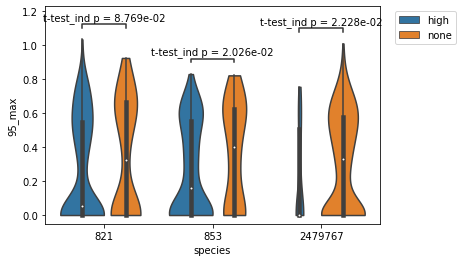

In [192]:
traces=glob.glob("data/Plectoneme/*_gene_plect_*_0.txt")
AA=pd.DataFrame()
BB=pd.DataFrame()
from statannot import add_stat_annotation
for trace in traces:
    type=os.path.basename(trace).split('_')[0]
    if type=='high':
        A=pd.read_csv(trace, delimiter="\t",names=['mean','median','95_max','area','len'])
        # A=A[A['area']!=0]
        A['type']=type
        A['species']=os.path.basename(trace).split('_')[3]
        A['filt']=str(os.path.basename(trace).split('_')[4].split('.')[0])
        AA=AA.append(A)
    else:
        B=pd.read_csv(trace, delimiter="\t",names=['mean','median','95_max','area','len'])
        # B=B[B['area']!=0]
        B['type']=type
        B['species']=os.path.basename(trace).split('_')[3]
        B['filt']=str(os.path.basename(trace).split('_')[4].split('.')[0])
        BB=BB.append(B)
    
C=AA.append(BB)
C=C[C['area']!=0]
C=C[C['len']>=1000]
C['density']=C['area']/C['len']
C['95_max/len']=C['95_max']/C['len']
C.dropna(inplace=True)
C=C.reset_index()
ax=sns.violinplot(data=C,y='95_max',x='species',hue='type',cut=0,scale='count')#,kind="violin",cut=0,scale="count", inner="quartile")

add_stat_annotation(ax, data=C, x='species', y='95_max',hue='type',
                    box_pairs=[(("821", "high"), ("821", "none")),
                                 (("853", "high"), ("853", "none")),
                                 (("2479767", "high"), ("2479767", "none"))
                                ],
                    test='t-test_ind', text_format='full', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

In [189]:
C

""


### add in Measurement of bacterial replication rates in microbial communities

## process figures

In [ ]:
traces= glob.glob('data/meta_unfilt/*bedgraph')
ori=pd.read_csv('data/doric10/OriC_db.bed',sep='\t')

for jac in traces:
    zzz=pd.read_csv(jac,sep='\t',names=['tmp','start','end','relAb'])
    tmp=ori[ori['Refseq'].str.contains('NC_'+jac.split('/')[2].split('_')[1])]
    
    plt.figure(figsize=(20, 5))
    try:
        print('running: '+str(tmp['Organism'].item())+" in "+str(os.path.basename(jac).split('_')[2].split('.')[0]))
        ss=np.int(np.round(tmp['start'].item(),-1))
        tt=np.int(np.round(tmp['end'].item(),-1))
        plt.bar(data=zzz[(zzz['start']>ss-250000)&(zzz['end']<tt+250000)],x='start',height='relAb',label='align',color='blue')#][zzz['start']=='1665929']
        plt.bar(data=tmp,x='start',height='OriC AT content',label='OriC start',color='orange')
        plt.bar(data=tmp,x='end',height='OriC AT content',label='OriC end',color='orange')

        plt.axes([.2, .6, .6, .2])
        plt.bar(data=zzz[(zzz['start']>ss-100) &(zzz['end']<tt+100)],x='start',height='relAb',label='align',color='blue')#][zzz['start']=='1665929']
        plt.bar(data=tmp,x='start',height='OriC AT content',label='OriC start',color='orange')
        plt.bar(data=tmp,x='end',height='OriC AT content',label='OriC end',color='orange')

        plt.xlabel("OriC ranges from "+str(tmp['start'].item())+" to "+str(tmp['end'].item())+" for "
            +str(tmp['Organism'].item())+" in "+str(os.path.basename(jac).split('_')[2].split('.')[0])+"max= "+
                   np.max(zzz['relAb'])+" between "+str(np.int(zzz[zzz['relAb']==np.max(zzz['relAb'])][['start']].values))+" and "+str(np.int(zzz[zzz['relAb']==np.max(zzz['relAb'])][['end']].values))+"; median= "+np.median(zzz['relAb']),fontsize=14)
        plt.savefig('img/oric/'+str(os.path.basename(jac).split('.')[0])+'.png',dpi=300,bbox_inches = "tight")

    except TypeError:
        pass
    except ValueError:
        pass

In [ ]:
ori[ori['Organism']=='Staphylococcus_aureus']

In [ ]:
tmp=ori[ori['Refseq'].str.contains('NC_'+jac.split('/')[2].split('_')[1])]

In [ ]:
bact_stat=pd.read_csv('flagstatA.txt',sep='\t',names=['q0','q1','type'])
bact_stat['sample']=bact_stat[bact_stat['q0'].str.contains(".bam")]['q0'].repeat(21).values
# bact_stat.loc[1:1000]
bact_stat['bact']=bact_stat['sample'].str.split('_').str[1].tolist()
bact_stat['pat']=bact_stat['sample'].str.split('_').str[2].tolist()
del bact_stat['sample'], bact_stat['q1']
bact_stat.dropna(how='any',inplace=True)
bact_stat=bact_stat[~bact_stat.type.str.contains("%")]

In [ ]:
bact_stat['q0']=bact_stat.q0.astype('int')
bact_stat['q1']=np.log10(bact_stat['q0'])

In [ ]:
sns.set_theme(style="whitegrid")
# iris = sns.load_dataset("iris")
plt.figure(figsize=(12, 24))
# "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(bact_stat, ["bact",'patient'], var_name="type")
# del bact_stat['sample'], bact_stat['q1']
# bact_stat.dropna(how='any',inplace=True)
# bact_stat=bact_stat[~bact_stat.type.str.contains("%")]
# Initialize the figure
# f, ax = plt.subplots()
# sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
ax=sns.stripplot(x="q1", y="type", hue="bact",
              data=bact_stat, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
ax=sns.pointplot(x="q1", y="type", hue="bact",
              data=bact_stat, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),ncol=2)
plt.savefig("flagstat.png",dpi=300,bbox_inches = "tight")

# Improve the legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, title="bact",
#           handletextpad=0, columnspacing=1,
#           loc='lower center', ncol=5, frameon=False)#,bbox_to_anchor=(1.05, 1),borderaxespad=0.)


In [ ]:
jeff=pd.pivot_table(bact_stat,columns='type',index=['bact','pat'],values='q0')

In [ ]:
jeff=jeff.reset_index()

In [ ]:
jeff =jeff.loc[:, (jeff != 0).any(axis=0)]
# del jeff['secondary']  
del jeff['primary mapped'], jeff['with itself and mate mapped']

In [ ]:
jeff

In [ ]:
sns.pairplot(jeff, hue="bact")
plt.savefig("flagstat_corr.png",dpi=300,bbox_inches = "tight")


In [ ]:
jeff0=pd.melt(jeff,id_vars=['bact','pat'])

In [ ]:
jeff0['log10_value']=np.log10(jeff0.value)

In [ ]:
sns.set_theme(style="whitegrid")
# iris = sns.load_dataset("iris")
plt.figure(figsize=(12, 24))
# "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(bact_stat, ["bact",'patient'], var_name="type")
# del bact_stat['sample'], bact_stat['q1']
# bact_stat.dropna(how='any',inplace=True)
# bact_stat=bact_stat[~bact_stat.type.str.contains("%")]
# Initialize the figure
# f, ax = plt.subplots()
# sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
ax=sns.stripplot(x="log10_value", y="type", hue="bact",
              data=jeff0, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
ax=sns.pointplot(x="log10_value", y="type", hue="bact",
              data=jeff0, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),ncol=2)
plt.savefig("flagstat_red.png",dpi=300,bbox_inches = "tight")

# Improve the legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, title="bact",
#           handletextpad=0, columnspacing=1,
#           loc='lower center', ncol=5, frameon=False)#,bbox_to_anchor=(1.05, 1),borderaxespad=0.)
